In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
from IPython.display import clear_output
import math
from itertools import combinations_with_replacement
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

plt.rcParams["figure.figsize"] = (30,10)
plt.style.use('dark_background')

# Functions

In [26]:
def compare(test1, test2, test3, test4, test5):
    a, b, c, d, e = [], [], [], [], []
    
    for i in test1.columns:
        a.append(int(float(i)))

    for i in test2.columns:
        b.append(int(float(i)))

    for i in test3.columns:
        c.append(int(float(i)))
        
    for i in test4.columns:
        d.append(int(float(i)))
    
    for i in test5.columns:
        e.append(int(float(i)))
        
    a = set(a)
    b = set(b)
    c = set(c)
    d = set(d)
    e = set(e)
    
    x = set.intersection(a, b, c, d, e)
        
    return list(x)

In [27]:
EVENTS = {
  'EURUSD':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'eur','second_currency':'usd',
            'symbol':'EURUSD','flag_buy':'EURUSD_buy','flag_sell':'EURUSD_sell','preco_euro':'EURUSD',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},
  'EURCHF':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'eur','second_currency':'chf',
            'symbol':'EURCHF','flag_buy':'EURCHF_buy','flag_sell':'EURCHF_sell','preco_euro':'EURCHF',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},
  'EURGBP':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'eur','second_currency':'gbp',
            'symbol':'EURGBP','flag_buy':'EURGBP_buy','flag_sell':'EURGBP_sell','preco_euro':'EURGBP',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},
  'EURJPY':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'eur','second_currency':'jpy',
            'symbol':'EURJPY','flag_buy':'EURJPY_buy','flag_sell':'EURJPY_sell','preco_euro':'EURJPY',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},
  'EURNZD':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'eur','second_currency':'nzd',
            'symbol':'EURNZD','flag_buy':'EURNZD_buy','flag_sell':'EURNZD_sell','preco_euro':'EURNZD',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},
  'EURAUD':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'eur','second_currency':'aud',
            'symbol':'EURAUD','flag_buy':'EURAUD_buy','flag_sell':'EURAUD_sell','preco_euro':'EURAUD',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},
  'EURCAD':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'eur','second_currency':'cad',
            'symbol':'EURCAD','flag_buy':'EURCAD_buy','flag_sell':'EURCAD_sell','preco_euro':'EURCAD',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},

  'GBPAUD':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'gbp','second_currency':'aud',
            'symbol':'GBPAUD','flag_buy':'GBPAUD_buy','flag_sell':'GBPAUD_sell','preco_euro':'EURGBP',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},
  'GBPCHF':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'gbp','second_currency':'chf',
            'symbol':'GBPCHF','flag_buy':'GBPCHF_buy','flag_sell':'GBPCHF_sell','preco_euro':'EURGBP',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},
  'GBPJPY':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'gbp','second_currency':'jpy',
            'symbol':'GBPJPY','flag_buy':'GBPJPY_buy','flag_sell':'GBPJPY_sell','preco_euro':'EURGBP',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},
  'GBPCAD':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'gbp','second_currency':'cad',
            'symbol':'GBPCAD','flag_buy':'GBPCAD_buy','flag_sell':'GBPCAD_sell','preco_euro':'EURGBP',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},
  'GBPUSD':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'gbp','second_currency':'usd',
            'symbol':'GBPUSD','flag_buy':'GBPUSD_buy','flag_sell':'GBPUSD_sell','preco_euro':'EURGBP',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},
  'GBPNZD':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'gbp','second_currency':'nzd',
            'symbol':'GBPNZD','flag_buy':'GBPNZD_buy','flag_sell':'GBPNZD_sell','preco_euro':'EURGBP',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},

  'USDCHF':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'usd','second_currency':'chf',
            'symbol':'USDCHF','flag_buy':'USDCHF_buy','flag_sell':'USDCHF_sell','preco_euro':'EURUSD',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},
  'USDJPY':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'usd','second_currency':'jpy',
            'symbol':'USDJPY','flag_buy':'USDJPY_buy','flag_sell':'USDJPY_sell','preco_euro':'EURUSD',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},
  'AUDUSD':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'aud','second_currency':'usd',
            'symbol':'AUDUSD','flag_buy':'AUDUSD_buy','flag_sell':'AUDUSD_sell','preco_euro':'EURAUD',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},
  'NZDUSD':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'nzd','second_currency':'usd',
            'symbol':'NZDUSD','flag_buy':'NZDUSD_buy','flag_sell':'NZDUSD_sell','preco_euro':'EURNZD',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},
  'USDCAD':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'usd','second_currency':'cad',
            'symbol':'USDCAD','flag_buy':'USDCAD_buy','flag_sell':'USDCAD_sell','preco_euro':'EURUSD',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},

  'AUDJPY':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'aud','second_currency':'jpy',
            'symbol':'AUDJPY','flag_buy':'AUDJPY_buy','flag_sell':'AUDJPY_sell','preco_euro':'EURAUD',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},
  'CADJPY':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'cad','second_currency':'jpy',
            'symbol':'CADJPY','flag_buy':'CADJPY_buy','flag_sell':'CADJPY_sell','preco_euro':'EURCAD',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},
  'CHFJPY':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'chf','second_currency':'jpy',
            'symbol':'CHFJPY','flag_buy':'CHFJPY_buy','flag_sell':'CHFJPY_sell','preco_euro':'EURCHF',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},
  'NZDJPY':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'nzd','second_currency':'jpy',
            'symbol':'NZDJPY','flag_buy':'NZDJPY_buy','flag_sell':'NZDJPY_sell','preco_euro':'EURNZD',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},

  'AUDCHF':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'aud','second_currency':'chf',
            'symbol':'AUDCHF','flag_buy':'AUDCHF_buy','flag_sell':'AUDCHF_sell','preco_euro':'EURAUD',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},
  'CADCHF':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'cad','second_currency':'chf',
            'symbol':'CADCHF','flag_buy':'CADCHF_buy','flag_sell':'CADCHF_sell','preco_euro':'EURCAD',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},
  'NZDCHF':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'nzd','second_currency':'chf',
            'symbol':'NZDCHF','flag_buy':'NZDCHF_buy','flag_sell':'NZDCHF_sell','preco_euro':'EURNZD',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},

  'AUDNZD':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'aud','second_currency':'nzd',
            'symbol':'AUDNZD','flag_buy':'AUDNZD_buy','flag_sell':'AUDNZD_sell','preco_euro':'EURAUD',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},
  'NZDCAD':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'nzd','second_currency':'cad',
            'symbol':'NZDCAD','flag_buy':'NZDCAD_buy','flag_sell':'NZDCAD_sell','preco_euro':'EURNZD',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]},

  'AUDCAD':{'buy':True,'sell':True,'buy_price':0,'sell_price':0,'first_currency':'aud','second_currency':'cad',
            'symbol':'AUDCAD','flag_buy':'AUDCAD_buy','flag_sell':'AUDCAD_sell','preco_euro':'EURAUD',
            'tk_sell':0,'sl_sell':0,'tk_buy':0,'sl_buy':0,'trade_history':[]}
}

def finance_calculation(balance, saldo_inicial, saldo_final, iteration=1, risk=0.01, eur='', preco_eur=0, compra=False, jpy=''):
    balance_calc = balance
    if balance < 1000:
        balance_calc = 1000
    risco = risk * 100
    #alavancagem = 100
    # Usar o risco como alavancagem. Assim eu multiplico o capital * Risco
    #lot = round(balance_calc // 1000 * 1000 * risco)
    lot = 10_000

    comission = (lot//1000) * 0.1

    if eur == 'eur':
        tot = (lot * (saldo_inicial - saldo_final)) / saldo_final
        tot2 = round(tot - comission,2)
        return (tot2 + balance), tot2
    else:
        tot = (lot * (saldo_inicial - saldo_final)) / saldo_final
        tot2 = round(tot / saldo_final / preco_eur - comission,2)
        return (tot2 + balance), tot2


def pip_calculation(pip_balance,preco_inicial, preco_final):
    pip = preco_inicial - preco_final
    return pip + pip_balance


def pct_backtest(data, risco=0.01 , tksl=1, balance=1000, single=True, tot=1, init_tp=5):
    """
    Se single False e for um multi test
    Mudar o valor de tot, pois alem do tamanho das iterações
    tot será usado como TP e SL
    """

    best_balance_result = balance
    balance_bests_results = pd.DataFrame()
    best_tksl = []

    risk = risco

    x = 0
    if single:
        x = list(range(1,2))
    else:
        x = list(range(init_tp,tot))

    for j in x:

        if not single:
            clear_output(wait=True)
            print(f'{j}/{tot-1}')

        buy_orders = []
        sell_orders = []

        balance_backtest = balance
        list_backtest = [balance_backtest]

        flag_jpy_buy, flag_jpy_sell = False, False
        flag_normal_buy, flag_normal_sell = False, False

        tk_normal, sl_normal, tk_jpy, sl_jpy = 0, 0, 0, 0
        if single:
            tk_normal = tksl / 10000
            sl_normal = tksl / 20000
            tk_jpy = tksl / 100
            sl_jpy = tksl / 200
        else:
            tk_normal = j / 10000
            sl_normal = j / 20000
            tk_jpy = j / 100
            sl_jpy = j / 200

        my_events = EVENTS

        for i in range(len(data)):

            buy_result = 0
            sell_result = 0

            for h in my_events.values():

                if data[h['flag_buy']].iloc[i] and h['buy']:
                    h['buy_price'] = data[h['symbol']].iloc[i]
                    h['buy'] = False
                    if h['second_currency'] == 'jpy':
                        h['tk_buy'] = data[h['symbol']].iloc[i] + tk_jpy
                        h['sl_buy'] = data[h['symbol']].iloc[i] - sl_jpy
                    else:
                        h['tk_buy'] = data[h['symbol']].iloc[i] + tk_normal
                        h['sl_buy'] = data[h['symbol']].iloc[i] - sl_normal
                if h['buy'] == False and data[h['symbol']].iloc[i] >= h['tk_buy']:
                    balance_backtest, buy_result = finance_calculation(balance=balance_backtest, iteration = tksl if single else j, risk = risk, saldo_inicial=h['tk_buy'],
                                                                       saldo_final=h['buy_price'], eur=h['first_currency'],
                                                                       preco_eur=data[h['preco_euro']].iloc[i], jpy=h['second_currency'])
                    list_backtest.append(balance_backtest)
                    buy_orders.append(buy_result)
                    h['trade_history'].append(buy_result)
                    h['buy'] = True
                elif h['buy'] == False and data[h['symbol']].iloc[i] <= h['sl_buy']:
                    balance_backtest, buy_result = finance_calculation(balance=balance_backtest, iteration = tksl if single else j, risk=risk, saldo_inicial=h['sl_buy'],
                                                                       saldo_final=h['buy_price'], eur=h['first_currency'],
                                                                       preco_eur=data[h['preco_euro']].iloc[i], jpy=h['second_currency'])
                    list_backtest.append(balance_backtest)
                    buy_orders.append(buy_result)
                    h['trade_history'].append(buy_result)
                    h['buy'] = True

                if data[h['flag_sell']].iloc[i] and h['sell']:
                    h['sell_price'] = data[h['symbol']].iloc[i]
                    h['sell'] = False
                    if h['second_currency'] == 'jpy':
                        h['tk_sell'] = data[h['symbol']].iloc[i] - tk_jpy
                        h['sl_sell'] = data[h['symbol']].iloc[i] + sl_jpy
                    else:
                        h['tk_sell'] = data[h['symbol']].iloc[i] - tk_normal
                        h['sl_sell'] = data[h['symbol']].iloc[i] + sl_normal

                if h['sell'] == False and data[h['symbol']].iloc[i] <= h['tk_sell']:
                    balance_backtest, sell_result = finance_calculation(balance=balance_backtest, iteration = tksl if single else j, risk=risk, saldo_inicial=h['sell_price'],
                                                                        saldo_final=h['tk_sell'], eur=h['first_currency'],
                                                                        preco_eur=data[h['preco_euro']].iloc[i], jpy=h['second_currency'])
                    list_backtest.append(balance_backtest)
                    sell_orders.append(sell_result)
                    h['trade_history'].append(sell_result)
                    h['sell'] = True
                elif h['sell'] == False and data[h['symbol']].iloc[i] >= h['sl_sell']:
                    balance_backtest, sell_result = finance_calculation(balance=balance_backtest, iteration = tksl if single else j, risk=risk,saldo_inicial=h['sell_price'],
                                                                        saldo_final=h['sl_sell'], eur=h['first_currency'],
                                                                        preco_eur=data[h['preco_euro']].iloc[i], jpy=h['second_currency'])
                    list_backtest.append(balance_backtest)
                    sell_orders.append(sell_result)
                    h['trade_history'].append(sell_result)
                    h['sell'] = True

        if single:
            balance_bests_results['result'] = pd.Series(list_backtest)
            balance_bests_results['buy'] = pd.Series(buy_orders)
            balance_bests_results['sell'] = pd.Series(sell_orders)
            for h in my_events:
                balance_bests_results[my_events[h]['symbol']] = pd.Series(my_events[h]['trade_history'])
            return balance_bests_results
        else:
            if balance_backtest > balance:
                balance_bests_results[f'TKSL:{j}'] = pd.Series(list_backtest)
                best_tksl.append(j)
                best_balance_result = balance_backtest

    balance_bests_results['best_tksl'] = pd.Series(best_tksl)
    return balance_bests_results


def pct_backtest_without_tpsl(data, risco=0.01, balance=1000):

    best_balance_result = balance
    balance_bests_results = pd.DataFrame()
    best_tksl = []

    buy_orders = []
    sell_orders = []

    balance_backtest = balance
    list_backtest = [balance_backtest]

    flag_jpy_buy, flag_jpy_sell = False, False
    flag_normal_buy, flag_normal_sell = False, False

    my_events = EVENTS

    for i in range(len(data)):

        clear_output(wait=True)
        print(f'{i}/{len(data)-1}')

        buy_result = 0
        sell_result = 0

        for h in my_events.values():

            if data[h['flag_buy']].iloc[i] and h['buy']:
                if not h['sell']:
                    h['buy_price'] = data[h['symbol']].iloc[i]
                    h['buy'] = False
                    h['sell'] = True
                    balance_backtest, sell_result = finance_calculation(balance=balance_backtest,  risk=risco, saldo_inicial=h['sell_price'],
                                                                        saldo_final=data[h['symbol']].iloc[i], eur=h['first_currency'],
                                                                        preco_eur=data[h['preco_euro']].iloc[i], jpy=h['second_currency'])
                    list_backtest.append(balance_backtest)
                    sell_orders.append(sell_result)
                    h['trade_history'].append(sell_result)
                else:
                    h['buy_price'] = data[h['symbol']].iloc[i]
                    h['buy'] = False

            if data[h['flag_sell']].iloc[i] and h['sell']:
                if not h['buy']:
                    h['sell_price'] = data[h['symbol']].iloc[i]
                    h['sell'] = False
                    h['buy'] = True
                    balance_backtest, buy_result = finance_calculation(balance=balance_backtest,  risk=risco, saldo_inicial=data[h['symbol']].iloc[i],
                                                                       saldo_final=h['buy_price'], eur=h['first_currency'],
                                                                       preco_eur=data[h['preco_euro']].iloc[i], jpy=h['second_currency'])
                    list_backtest.append(balance_backtest)
                    buy_orders.append(buy_result)
                    h['trade_history'].append(buy_result)
                else:
                    h['sell_price'] = data[h['symbol']].iloc[i]
                    h['sell'] = False


    balance_bests_results['result'] = pd.Series(list_backtest)
    balance_bests_results['buy'] = pd.Series(buy_orders)
    balance_bests_results['sell'] = pd.Series(sell_orders)
    for h in my_events:
        balance_bests_results[my_events[h]['symbol']] = pd.Series(my_events[h]['trade_history'])

    return balance_bests_results


def walk_forward_test(walk1, test1, walk2, test2, walk3, test3, walk4, test4, walk5, test5, final, tot_iterations, plot=False, risk=0.01):

    test_walk1 = pct_backtest(walk1, risco=risk, single=False, tot=tot_iterations)

    walk1_test1_test = pd.DataFrame()
    for i in range(len(test_walk1.iloc[:,-1].dropna())):
        clear_output(wait=True)
        print(f'Teste 1: {i}/{len(test_walk1.iloc[:,-1].dropna())}')
        result_test1 = pct_backtest(test1, risco=risk, tksl=test_walk1['best_tksl'].iloc[i])
        walk1_test1_test[f"{test_walk1['best_tksl'].iloc[i]}"] = result_test1['result']

    test_walk2 = pct_backtest(walk2, risco=risk, single=False, tot=tot_iterations)

    walk2_test2_test = pd.DataFrame()
    for i in range(len(test_walk2.iloc[:,-1].dropna())):
        clear_output(wait=True)
        print(f'Teste 2: {i}/{len(test_walk2.iloc[:,-1].dropna())}')
        result_test2 = pct_backtest(test2, risco=risk, tksl=test_walk2['best_tksl'].iloc[i])
        walk2_test2_test[f"{test_walk2['best_tksl'].iloc[i]}"] = result_test2['result']

    test_walk3 = pct_backtest(walk3, risco=risk, single=False, tot=tot_iterations)

    walk3_test3_test = pd.DataFrame()
    for i in range(len(test_walk3.iloc[:,-1].dropna())):
        clear_output(wait=True)
        print(f'Teste 3: {i}/{len(test_walk3.iloc[:,-1].dropna())}')
        result_test3 = pct_backtest(test3, risco=risk, tksl=test_walk3['best_tksl'].iloc[i])
        walk3_test3_test[f"{test_walk3['best_tksl'].iloc[i]}"] = result_test3['result']

    test_walk4 = pct_backtest(walk4, risco=risk, single=False, tot=tot_iterations)

    walk4_test4_test = pd.DataFrame()
    for i in range(len(test_walk4.iloc[:,-1].dropna())):
        clear_output(wait=True)
        print(f'Teste 4: {i}/{len(test_walk4.iloc[:,-1].dropna())}')
        result_test4 = pct_backtest(test4, risco=risk, tksl=test_walk4['best_tksl'].iloc[i])
        walk4_test4_test[f"{test_walk4['best_tksl'].iloc[i]}"] = result_test4['result']

    test_walk5 = pct_backtest(walk5, risco=risk, single=False, tot=tot_iterations)

    walk5_test5_test = pd.DataFrame()
    for i in range(len(test_walk5.iloc[:,-1].dropna())):
        clear_output(wait=True)
        print(f'Teste 5: {i}/{len(test_walk5.iloc[:,-1].dropna())}')
        result_test5 = pct_backtest(test5, risco=risk, tksl=test_walk5['best_tksl'].iloc[i])
        walk5_test5_test[f"{test_walk5['best_tksl'].iloc[i]}"] = result_test5['result']

    x = compare(walk5_test5_test, walk4_test4_test, walk3_test3_test, walk2_test2_test, walk1_test1_test)
    test_final = pd.DataFrame()
    for i in range(len(x)):
        clear_output(wait=True)
        print(f'Final: {i}/{len(x)-1}')
        final_result = pct_backtest(test5, risco=risk, tksl=x[i])
        test_final[f"{x[i]}"] = final_result['result']

    if plot:
        try:
            test_walk1.iloc[:,:-1].plot()
            plt.title('Teste Walk 1', fontsize=30)
            plt.grid()
        except TypeError:
            print('No data to plot.')

        try:
            walk1_test1_test.plot()
            plt.title('Teste 1', fontsize=30)
            plt.grid()
        except TypeError:
            print('No data to plot.')

        try:
            test_walk2.iloc[:,:-1].plot()
            plt.title('Teste Walk 2', fontsize=30)
            plt.grid()
        except TypeError:
            print('No data to plot.')

        try:
            walk2_test2_test.plot()
            plt.title('Teste 2', fontsize=30)
            plt.grid()
        except TypeError:
            print('No data to plot.')

        try:
            test_walk3.iloc[:,:-1].plot()
            plt.title('Teste Walk 3', fontsize=30)
            plt.grid()
        except TypeError:
            print('No data to plot.')

        try:
            walk3_test3_test.plot()
            plt.title('Teste 3', fontsize=30)
            plt.grid()
        except TypeError:
            print('No data to plot.')

        try:
            test_walk4.iloc[:,:-1].plot()
            plt.title('Teste Walk 4', fontsize=30)
            plt.grid()
        except TypeError:
            print('No data to plot.')

        try:
            walk4_test4_test.plot()
            plt.title('Teste 4', fontsize=30)
            plt.grid()
        except TypeError:
            print('No data to plot.')

        try:
            test_walk5.iloc[:,:-1].plot()
            plt.title('Teste Walk 5', fontsize=30)
            plt.grid()
        except TypeError:
            print('No data to plot.')

        try:
            walk5_test5_test.plot()
            plt.title('Teste 5', fontsize=30)
            plt.grid()
        except TypeError:
            print('No data to plot.')

        try:
            test_final.plot()
            plt.title('Final', fontsize=30)
            plt.grid()
        except TypeError:
            print('No data to plot.')

    return list(test_final.columns)


In [28]:
def walk_forward_split(data):

    tot_len = len(data)

    split1 = int(round(tot_len * 0.105, 0))
    split2 = int(round(tot_len * 0.14, 0))
    split3 = int(round(tot_len * 0.245, 0))
    split4 = int(round(tot_len * 0.28, 0))
    split5 = int(round(tot_len * 0.385, 0))
    split6 = int(round(tot_len * 0.42, 0))
    split7 = int(round(tot_len * 0.525, 0))
    split8 = int(round(tot_len * 0.56, 0))
    split9 = int(round(tot_len * 0.665, 0))
    split10 = int(round(tot_len * 0.7, 0))

    walk1 = data.iloc[:split1]
    test1 = data.iloc[split1:split2]
    walk2 = data.iloc[split2:split3]
    test2 = data.iloc[split3:split4]
    walk3 = data.iloc[split4:split5]
    test3 = data.iloc[split5:split6]
    walk4 = data.iloc[split6:split7]
    test4 = data.iloc[split7:split8]
    walk5 = data.iloc[split8:split9]
    test5 = data.iloc[split9:split10]
    final = data.iloc[split10:]

    x = len(walk1) + len(test1) + len(walk2) + len(test2) + len(walk3) + len(test3) + len(walk4) + len(test4) + len(walk5) + len(test5) + len(final)
    y = len(data)

    print(f'Dados tem len de {y} e o split tem len de {x}.')

    return walk1, test1, walk2, test2, walk3, test3, walk4, test4, walk5, test5, final

# Program

In [29]:
data = pd.read_csv('/content/6535.csv').drop(columns=(['Unnamed: 0']))

In [30]:
walk1, test1, walk2, test2, walk3, test3, walk4, test4, walk5, test5, final = walk_forward_split(data)
risk = 0.1
test = walk_forward_test(walk1, test1, walk2, test2, walk3, test3, walk4, test4, walk5, test5, final, 51, plot=True)

Output hidden; open in https://colab.research.google.com to view.

In [31]:
test

['24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50']

50


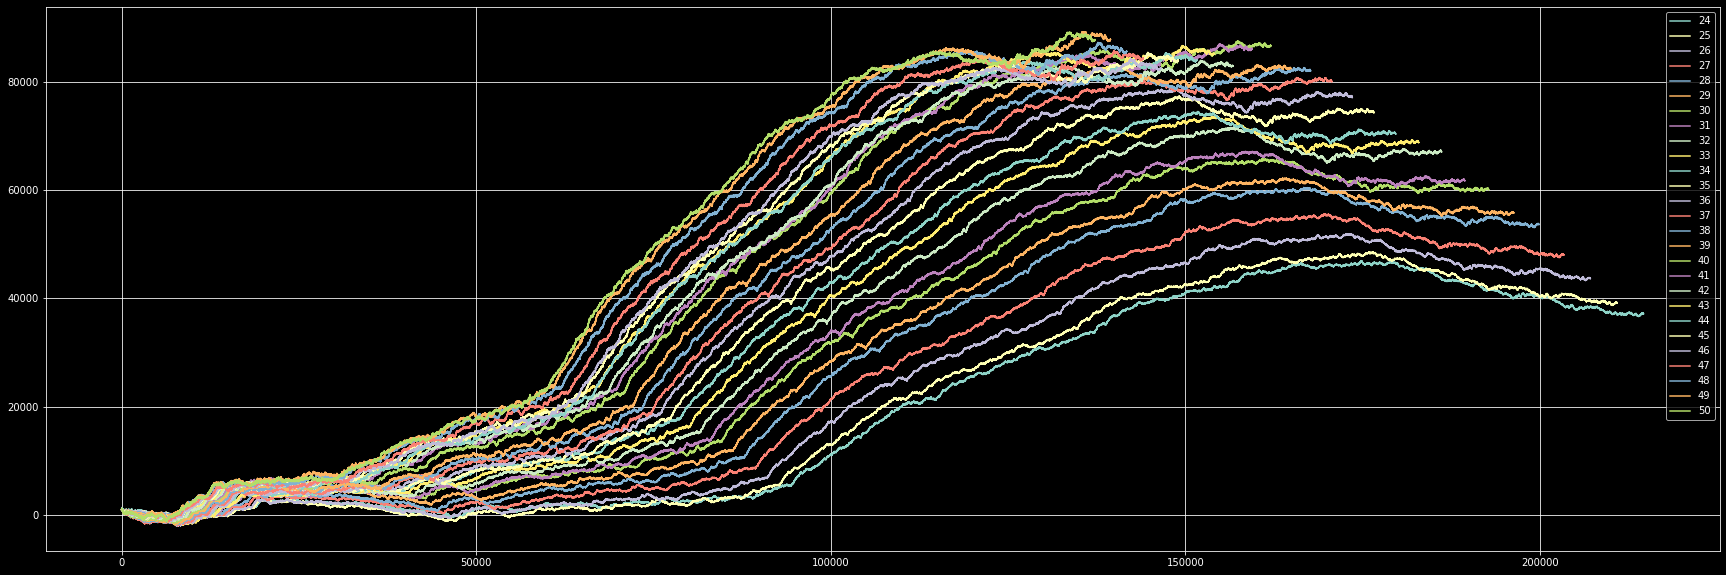

In [32]:
single_final_test = pd.DataFrame()
for i in test:
    clear_output(wait=True)
    print(f'{i}')
    a = pct_backtest(data, risco=risk, tksl=int(i))
    single_final_test[f'{i}'] = a['result']
single_final_test.plot()
plt.grid()

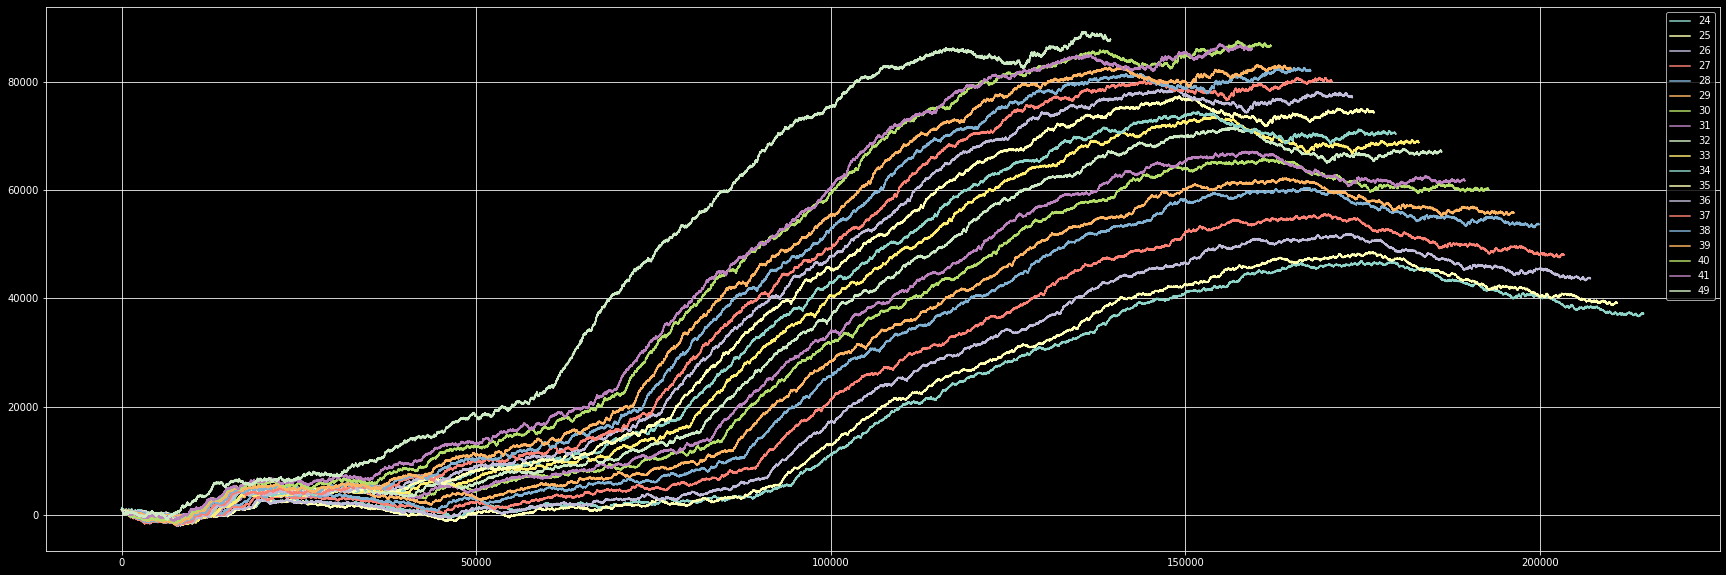

In [33]:
bests_results_lr = []
cut = 0.0
for i in single_final_test.columns:
    lr_test = pd.DataFrame()
    lr_test['x'] = pd.Series(range(len(single_final_test[i].dropna())))
    lr_test['y'] = single_final_test[i].dropna()
    x_v = lr_test[['x']]
    y_v = lr_test[['y']]
    model = LinearRegression()
    model.fit(x_v, y_v)
    result = model.score(x_v, y_v)
    equity = single_final_test[i].dropna().iloc[-1]
    if result > cut:
        bests_results_lr.append(i)
        cut = result
single_final_test[bests_results_lr].plot()
plt.grid()

In [34]:
single_final_test.max().max()

89269.3400000043